In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [3]:
df1 = pd.read_csv("stroke_data.csv")

In [4]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#getting list of columns of dataset
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
df1.shape

(5110, 12)

In [ ]:
#statistics data
df1.describe()

# Data Cleaning Process

Here we can see that bmi has nun value. We have to either delete the value or put mean value of bmi to handle this data problem

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Handling missing values

In [7]:
df1.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
#replacing NULL value with mean
df1['bmi'].fillna(df1['bmi'].mean(),inplace=True)

In [9]:
df1.isnull().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now all the null value are zero.

In [10]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Removing Columns

In [11]:
df1 = df1.drop('id', axis=1) #id column not necessary


In [12]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Data Preprocessing



# Encoding

-- Here gender, work_type, ever_married, recidence_type, smoking_status are categorical features.
We need to convert those into numerical data

In [13]:
df1['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

# LABEL Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [15]:
gender = le.fit_transform(df1['gender'])
smoking_status = le.fit_transform(df1['smoking_status'])
work_type = le.fit_transform(df1['work_type'])
Residence_type = le.fit_transform(df1['Residence_type'])
ever_married = le.fit_transform(df1['ever_married'])

In [16]:
df1['ever_married'] = ever_married
df1['Residence_type'] = Residence_type
df1['smoking_status'] = smoking_status
df1['gender'] = gender
df1['work_type'] = work_type

In [17]:
df1['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [18]:
df1['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [19]:
df1[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()


,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# SPLIT THE DATASET INTO X & Y

In [21]:
#iloc : position based function

df1.iloc[0]  # print first row

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           1.00
work_type              2.00
Residence_type         1.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         1.00
stroke                 1.00
Name: 0, dtype: float64

In [22]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [23]:
#print first row 2nd column value

df1.iloc[0,1]

67.0

# Rows:
*****data.iloc[0] # first row of data frame
**data.iloc[1] # second row of data frame 
**data.iloc[-1] # last row of data frame \\

# Columns:
**data.iloc[:,0] # first column of data frame \\
**data.iloc[:,1] # second column of data frame \\
**data.iloc[:,-1] # last column of data frame \\

In [24]:
df1.iloc[:,0:-1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [45]:
 df1.iloc[:,-1]

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# X and Y Splitting

In [25]:
x = df1.iloc[:,1:-1].values
y = df1.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 9)
Y Shape (5110,)


# Splitting the dataset into the Training set and Test set 


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [35]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4088, 9)
Number transactions y_train dataset:  (4088,)
Number transactions x_test dataset:  (1022, 9)
Number transactions y_test dataset:  (1022,)


# Handling imbalanced data using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE


In [37]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 9)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


# Model Building


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

# Random Forest 

In [41]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_res, y_train_res)
y_pred = model_rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9403131115459883

# ANN model with Keras

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [43]:
model = Sequential()
# add first hidden layer with input diamension
model.add(Dense(units = 32, activation='relu', kernel_initializer = 'he_uniform', input_dim = 9))
# add second hidden layer
model.add(Dense(units = 16, activation='relu', kernel_initializer = 'he_uniform'))
# add output layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

# SVM

In [44]:
model_svm = SVC()
model_svm.fit(x_train_res, y_train_res)
y_svm = model_svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_svm)
#cm_svm = confusion_matrix(y_svm, y_test)
acc_svm

0.7172211350293543

# Random Forest

In [45]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_res, y_train_res)
y_rf = model_rf.predict(x_test)
acc_rf = accuracy_score(y_rf, y_test)
#cm_rf = confusion_matrix(y_test, Y-rf)
acc_rf

0.9403131115459883

# XGBoost

In [46]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train_res, y_train_res)
print('Training Score: {}'.format(xgb_model.score(x_train_res, y_train_res)))

print('Test Score: {}'.format(xgb_model.score(x_test, y_test)))


/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.9992293860775752
Test Score: 0.9461839530332681


# Decission Tree

In [47]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_res, y_train_res)
print('Training Score: {}'.format(xgb_model.score(x_train_res, y_train_res)))

print('Test Score: {}'.format(dt_model.score(x_test, y_test)))

Training Score: 0.9992293860775752
Test Score: 0.9099804305283757


In [48]:
KNeighborsClassifier

sklearn.neighbors._classification.KNeighborsClassifier

In [49]:
model_kn = RandomForestClassifier()
model_kn.fit(x_train_res, y_train_res)
y_kn = model_kn.predict(x_test)
accuracy_score(y_test, y_kn)

#print('Training Score: {}'.format(kn_model.score(x_train_res, y_train_res)))

#print('Test Score: {}'.format(kn_model.score(x_test, y_test)))

0.9412915851272016

In [54]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

Logistic Regreesion :
[[756 212]
 [ 17  37]]
Accuracy Score:  0.7759295499021527

K-Fold Validation Mean Accuracy: 77.87 %

Standard Deviation: 2.13 %

ROC AUC Score: 0.73

Precision: 0.15

Recall: 0.69

F1: 0.24
-----------------------------------

SVM :
[[691 277]
 [ 12  42]]
Accuracy Score:  0.7172211350293543

K-Fold Validation Mean Accuracy: 78.40 %

Standard Deviation: 1.80 %

ROC AUC Score: 0.75

Precision: 0.13

Recall: 0.78

F1: 0.23
-----------------------------------

KNeighbors :
[[809 159]
 [ 28  26]]
Accuracy Score:  0.8170254403131115

K-Fold Validation Mean Accuracy: 88.94 %

Standard Deviation: 1.11 %

ROC AUC Score: 0.66

Precision: 0.14

Recall: 0.48

F1: 0.22
-----------------------------------

Decision Tree :
[[919  49]
 [ 44  10]]
Accuracy Score:  0.9090019569471625

K-Fold Validation Mean Accuracy: 94.39 %

Standard Deviation: 5.62 %

ROC AUC Score: 0.57

Precision: 0.17

Recall: 0.19

F1: 0.18
-----------------------------------

Random Forest :
[[963   5]
 [ 5

/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/ana

XGBoost :
[[963   5]
 [ 50   4]]
Accuracy Score:  0.9461839530332681

K-Fold Validation Mean Accuracy: 96.48 %

Standard Deviation: 6.88 %

ROC AUC Score: 0.53

Precision: 0.44

Recall: 0.07

F1: 0.13
-----------------------------------



In [55]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
5,XGBoost,94.618395,96.481944,6.880744,0.534454,0.444444,0.074074,0.126984
4,Random Forest,94.227006,97.021394,6.499430,0.497417,0.000000,0.000000,0.000000
3,Decision Tree,90.900196,94.388379,5.618259,0.567283,0.169492,0.185185,0.176991
2,KNeighbors,81.702544,88.941428,1.106935,0.658613,0.140541,0.481481,0.217573
0,Logistic Regreesion,77.592955,77.870036,2.132213,0.733088,0.148594,0.685185,0.244224
1,SVM,71.722114,78.396930,1.796819,0.745810,0.131661,0.777778,0.225201


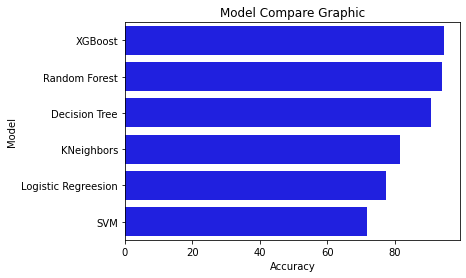

In [56]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');


# Model Tuning using GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV


In [59]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]),  
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [60]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')


/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

LogisticRegression():
Best Accuracy : 78.00%
Best Parameters :  {'C': 0.5, 'random_state': 0}

----------------

KNeighborsClassifier():
Best Accuracy : 90.23%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}

----------------

SVC():
Best Accuracy : 78.40%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 94.85%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 97.16%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------



/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/ana

/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/sharmin/opt/ana

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None):
Best Accuracy : 96.40%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.1}

----------------



# Tuning model

Here, After tuning we can see Random classifier and xgbclassifier have highest accuracy score

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022

ROC AUC score: 0.7520087235996327
Accuracy Score:  0.9422700587084148


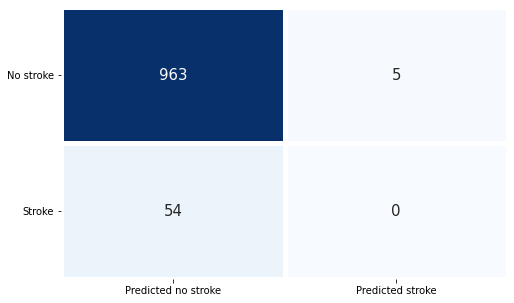

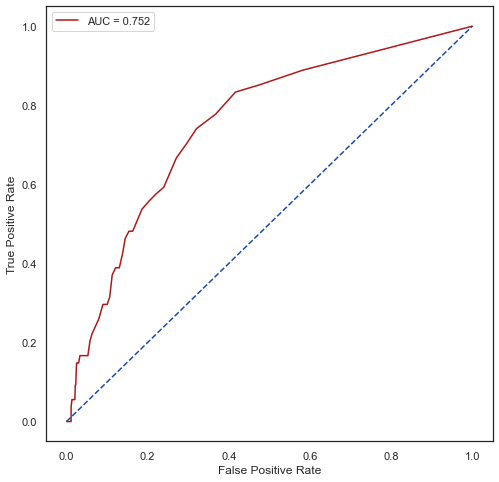

In [62]:
#Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


/Users/sharmin/opt/anaconda3/envs/StrokeTensorflow/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.10      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.52      0.50      0.50      1022
weighted avg       0.90      0.94      0.92      1022

ROC AUC score: 0.7848083103764921
Accuracy Score:  0.9393346379647749


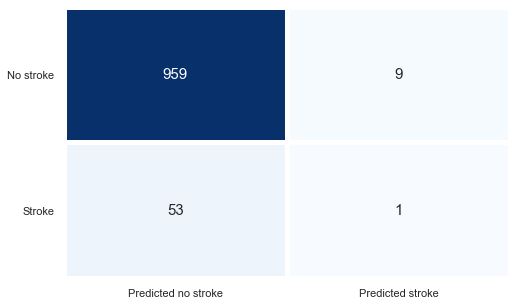

Text(0.5, 0, 'False Positive Rate')

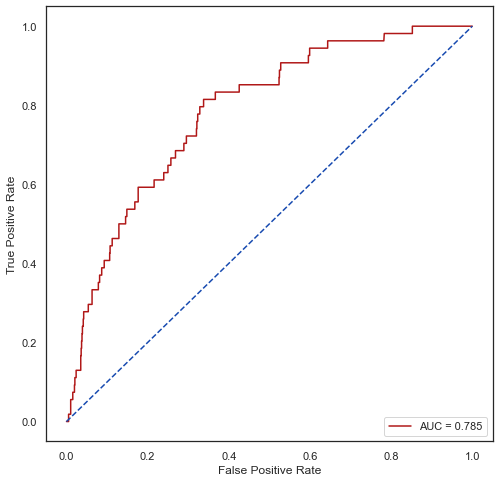

In [63]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


# Keras ANN 

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt


In [102]:
model = Sequential()
# add first hidden layer with input diamension
model.add(Dense(units = 32, activation='relu', kernel_initializer = 'he_uniform', input_dim = 9))
# add second hidden layer
model.add(Dense(units = 16, activation='relu', kernel_initializer = 'he_uniform'))
# add output layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [103]:
# now we compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model
model.fit(x_train_res, y_train_res, batch_size = 128, epochs = 50, verbose = 1)

Epoch 1/50
7786/7786 [==============================] - 1s 71us/step - loss: 12.1488 - accuracy: 0.5281
Epoch 2/50
7786/7786 [==============================] - 0s 13us/step - loss: 0.5995 - accuracy: 0.7122
Epoch 3/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.5355 - accuracy: 0.7291
Epoch 4/50
7786/7786 [==============================] - 0s 13us/step - loss: 0.5220 - accuracy: 0.7291
Epoch 5/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.5130 - accuracy: 0.7308
Epoch 6/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.4975 - accuracy: 0.7379
Epoch 7/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.4945 - accuracy: 0.7475
Epoch 8/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.4873 - accuracy: 0.7539
Epoch 9/50
7786/7786 [==============================] - 0s 12us/step - loss: 0.4776 - accuracy: 0.7624
Epoch 10/50
7786/7786 [==============================] - 0s 12us/step - 

In [117]:
acc = model.evaluate(x_test, y_test)


1022/1022 [==============================] - 0s 97us/step


In [118]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [119]:
y_ann = model.predict(x_test)
y_ann = y_ann > 0.5

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ann, y_test)
cm

array([[636,   8],
       [332,  46]])

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_ann, y_test))

              precision    recall  f1-score   support

       False       0.66      0.99      0.79       644
        True       0.85      0.12      0.21       378

    accuracy                           0.67      1022
   macro avg       0.75      0.55      0.50      1022
weighted avg       0.73      0.67      0.58      1022



In [122]:
print("Artificial Neural Network Accuracy : ", acc)

Artificial Neural Network Accuracy :  [0.6394341878461745, 0.6673189997673035]
